***Participantes (RM - NOME):***<br>
FELIPE LEMOS SCUDELLER - 347942<br>
FABIO MARCELO DE SOUZA - 347773<br>
VICTOR GABRIEL DOS SANTOS GALVÃO - 348659<br>

# **Apresentação do Desafio**

##**Contexto e Desafios**


A **QuantumFinance** tem um canal de atendimento via chat e precisar classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para algum uma área especialista no assunto para uma melhor tratativa.
O desafio de sua equipe é
Parte 1 - Criar um modelo classificador de assuntos aplicando técnicas tradicionais de NLP, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do modelo seu modelo.​
Parte 2 – Realizar a tarefa de classificação apresentada no ítem anterior com a utilização IA Generativa, utilizando as técnicas de prompt engineering discutidas em sala
Parte 3 (Extra) – Utilizar a IA Generativa para fazer uma classificação livre de assuntos e avaliar qualitativamente os resultados.
Observação: Nas partes 2 e 3 do trabalho utilizar a base de dados estratificada disponibilizada em [2]. Esta amostra possui 200 registros de cada categoria. Este ajuste deve-se à limitação do número de tokens disponibilizados no modo gratuito da API da openAI. Para fazer o desenvolvimento de prompt, busque rodar com poucos exemplos e ir incrementando aos poucos, a medida em que vá melhorando.

​[1] - https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line.csv
[2] - https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line_generative.csv


##**Entregáveis**

**Jupyter Notebook:**

O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado. Utilize o notebook de template para a entrega.
O modelo precisar atingir um score na métrica F1 Score superior a 75%. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​
Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Importante:**  parte significativa da avaliação do resultado será feita com a execução do notebook. Desta forma, é importante que todas as células executem corretamente e que os resultados sejam integralmente reprodutíveis;

##**Notas e Grupos**

**Notas:**

Parte 1 (70%), sendo:

35% - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)

35% - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com a Métrica F1 Score). Separar o pipeline completo do modelo campeão conforme template.​

Parte 2 (30%)

Parte 3 (Extra): Poderá acrescentar em até 2 pontos a nota do trabalho final.

**Grupos:**

O trabalho deverá ser feito, **necessariamente**, em grupo de 3 até 4 pessoas

# **Entrega**

## **Parte 1**

In [1]:
!pip install pandas numpy matplotlib seaborn unidecode nltk scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [2]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.pipeline import make_pipeline
import openai
import time
import threading

# Baixar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
def texto_preprocessado(texto):
    # Função para pré-processar o texto:
    # - Remove acentos
    # - Converte para minúsculas
    # - Remove pontuação
    # - Tokenização
    # - Remoção de stopwords
    texto = unidecode.unidecode(texto)
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(texto, language='portuguese')
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    texto = ' '.join(tokens)
    return texto

def preprocessar_treinar_melhor_modelo(X_train, y_train, X_test, y_test):
    # Função para treinar vários modelos de classificação e escolher o melhor com base no F1-Score
    # Colocado a função "texto_preprocessado" no argumento preprocessor
    print("Dados foram preprocessados usando a função texto_preprocessado no argumento processor do CountVectorizer!")
    modelos = {
        "Naive Bayes": make_pipeline(CountVectorizer(preprocessor=texto_preprocessado), MultinomialNB()),
        "Random Forest": make_pipeline(CountVectorizer(preprocessor=texto_preprocessado), RandomForestClassifier(random_state=42)),
        "SVM - SVC": make_pipeline(CountVectorizer(preprocessor=texto_preprocessado), SVC(random_state=42)),
        "Gradient Boosting": make_pipeline(CountVectorizer(preprocessor=texto_preprocessado), GradientBoostingClassifier(random_state=42))
    }

    melhor_modelo = None
    melhor_f1 = 0.0

    print("Calculando F1-Score para escolher o melhor modelo")

    for nome_modelo, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='macro')  # Calcula o F1-Score
        print(f"F1-Score {nome_modelo}: {f1}")

        if f1 > melhor_f1:
            melhor_f1 = f1
            melhor_modelo = modelo

    print(f"Modelo campeão: {melhor_modelo.steps[1][0]} com F1-Score de {melhor_f1}")
    return melhor_modelo

def avaliar_modelo(model, X_test, y_test):
    # Função para avaliar o desempenho do modelo usando acurácia, matriz de confusão e classification report
    prod = model.predict(X_test)
    acc = accuracy_score(y_test, prod)
    print("Acurácia do modelo:", acc)
    print("")
    cm = confusion_matrix(y_test, prod)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    print("")
    print("Classification Report:")
    print(classification_report(y_test, prod))

In [5]:
# Carregar os dados
df = pd.read_csv('https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line.csv', delimiter=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


In [7]:
df['descricao_reclamacao'][:20]

0     Bom dia, meu nome é xxxx xxxx e agradeço se vo...
1     Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...
2     O cartão Chase foi relatado em xx/xx/2019. No ...
3     Em xx/xx/2018, enquanto tentava reservar um ti...
4     Meu neto me dê cheque por {$ 1600,00} Eu depos...
5                          Você pode remover a consulta
6     Sem aviso prévio J.P. Morgan Chase restringiu ...
7     Durante os meses de verão, experimento uma ren...
8     Em xxxx xx/xx/2019, fiz um pagamento {$ 300.00...
9     Eu tenho um cartão de crédito Chase que está r...
10       Mishandling desta conta por Chase Auto e XXXX.
11    Entrei em contato com o XXXX várias vezes na t...
12    Abri uma conta no Chase Bank no xxxx e usei um...
13    Para quem possa interessar, o Chase Bank cobro...
14    Meu cartão Chase Amazon foi recusado para uma ...
15    Abri a conta de poupança para o bônus {$ 25,00...
16    Xxxx xxxx um sofá, assento de amor, mesa e cad...
17    Meu cartão desapareceu e eu não percebi at

In [8]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['descricao_reclamacao'], df['categoria'], test_size = 0.25, random_state = 42)

In [9]:
# Treinar modelo campeão
modelo = preprocessar_treinar_melhor_modelo(X_train, y_train, X_test, y_test)

Dados foram preprocessados usando a função texto_preprocessado no argumento processor do CountVectorizer!
Calculando F1-Score para escolher o melhor modelo
F1-Score Naive Bayes: 0.7977175706016025
F1-Score Random Forest: 0.7842563247443859
F1-Score SVM - SVC: 0.8779216077713267
F1-Score Gradient Boosting: 0.8706750375633211
Modelo campeão: svc com F1-Score de 0.8779216077713267


Modelo Campeão com melhor F1 Score é o SVM - SVC

Acurácia do modelo: 0.8828777524677297



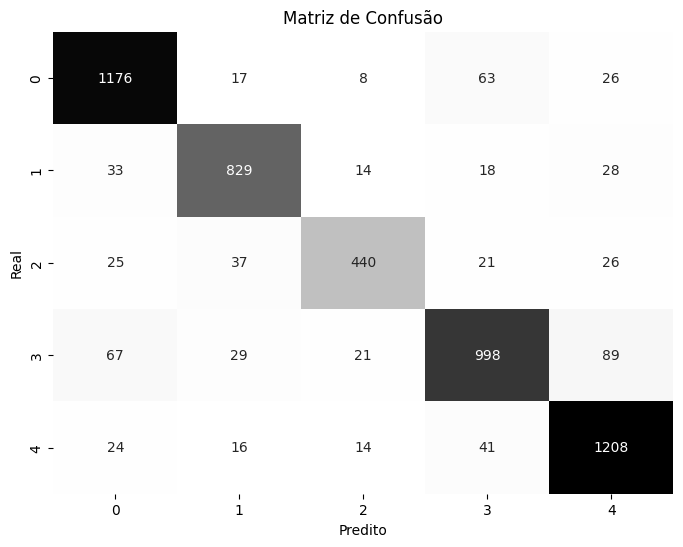


Classification Report:
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.89      0.91      0.90      1290
            Hipotecas / Empréstimos       0.89      0.90      0.90       922
                             Outros       0.89      0.80      0.84       549
       Roubo / Relatório de disputa       0.87      0.83      0.85      1204
         Serviços de conta bancária       0.88      0.93      0.90      1303

                           accuracy                           0.88      5268
                          macro avg       0.88      0.87      0.88      5268
                       weighted avg       0.88      0.88      0.88      5268



In [10]:
# Avaliar o modelo
avaliar_modelo(modelo, X_test, y_test)

Conforme exibido acima, o modelo escolhido possui mais que 75% para cada classe, atingindo a meta do modelo

## **Parte 2**

In [11]:
# Definindo a chave da API OpenAI
# Foi feito processamento em paralelo, devido a limitação do modelo de open ai que suporte até 1000 TPM
openai.api_key = ''

# Carregando o DataFrame
df_gen = pd.read_csv('https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line_generative.csv', delimiter=';')


#Para não sobrecarregar a API com alto volume e termos gastos elevados, carregaremos apenas com 200 linhas
df_gen = df_gen.head(200)

In [12]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         200 non-null    int64 
 1   data_abertura         200 non-null    object
 2   categoria             200 non-null    object
 3   descricao_reclamacao  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [13]:
def texto_preprocessado(texto):
    # Função para pré-processar o texto:
    # - Remove acentos
    # - Converte para minúsculos
    # - Remove pontuação
    # - Tokenização
    # - Remoção de stopwords
    texto = unidecode.unidecode(texto)
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(texto, language='portuguese')
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    texto = ' '.join(tokens)
    return texto

In [14]:
def lidar_openai_requests_batch(prompts_batch):
    respostas_batch = []
    try:
        for prompt in prompts_batch:
            # Solicitando classificação para o prompt atual
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.3,
                max_tokens=30
            )
            # Adicionando a resposta à lista de respostas
            respostas_batch.append(response['choices'][0]['message']['content'])

    except Exception as e:
        print(f"Erro durante a solicitação: {e}")
    return respostas_batch

In [15]:
def processo_prompt_engeneering(descricao_reclamacao):
    # Prefixo que define o papel do modelo como classificador de reclamações
    prefixo = "O papel do modelo é classificar reclamações de clientes. Dada a seguinte reclamação:"

    # Descrição da reclamação
    reclamacao = f"'{descricao_reclamacao}'"

    # Opções de categorias para classificação
    categorias = "Cartão de crédito / Cartão pré-pago, Hipotecas / Empréstimos, Roubo / Relatório de disputa, Serviços de conta bancária, Outros"

    # Prompt completo com o prefixo, descrição da reclamação e opções de categorias
    prompt = f"{prefixo} {reclamacao}, classifique-a em uma das seguintes categorias: {categorias}."

    return prompt

In [16]:
def processar_lotes(df, start_index, end_index, all_responses_classificados):
    df_batch = df_gen.iloc[start_index:end_index]
    print(f"Processando índices {start_index} a {end_index - 1}")
    # Construir o prompt com contexto e instruções para categorias específicas
    prompts_batch = []
    for index, row in df_batch.iterrows():
        descricao_reclamacao = row['descricao_reclamacao']
        prompt = processo_prompt_engeneering(descricao_reclamacao)
        prompts_batch.append(prompt)

    responses_classificados = lidar_openai_requests_batch(prompts_batch)

    # Processamento das respostas para remover pontos finais das classes devido a peculiaridade do Modelo
    respostas_sem_ponto_final = [resposta.rstrip('.') for resposta in responses_classificados]

    # Adicionar as respostas classificadas à lista global
    all_responses_classificados.extend(respostas_sem_ponto_final)

In [17]:
def processar_lotes_em_paralelo(df, batch_size):
    all_responses_classificados = []  # Lista para armazenar todas as respostas classificadas
    threads = []
    for i in range(0, len(df), batch_size):
        end_index = min(i + batch_size, len(df))
        df_batch = df.iloc[i:end_index]  # Obtém o lote atual do DataFrame
        thread = threading.Thread(target=processar_lotes, args=(df_batch, i, end_index, all_responses_classificados))
        thread.start()
        threads.append(thread)
        time.sleep(60)  # Adicione um atraso entre as threads para evitar atingir o limite de solicitações por minuto

    for thread in threads:
        thread.join()

    print("Processamento concluído.")

    return all_responses_classificados

In [18]:
# Pré-processamento da coluna descricao_reclamacao do DataFrame df_gen
df_gen['descricao_reclamacao'] = df_gen['descricao_reclamacao'].apply(texto_preprocessado)

In [19]:
# Chamada para iniciar o processamento em paralelo e obter todas as respostas classificadas
batch_size =100
respostas_classificadas_saida = processar_lotes_em_paralelo(df_gen, batch_size) ## Dataframe e Bach_size são os argumentos

Processando índices 0 a 99
Processando índices 100 a 199
Processamento concluído.


In [20]:
respostas_classificadas_saida[:5]

['Serviços de conta bancária',
 'Cartão de crédito / Cartão pré-pago',
 'Roubo / Relatório de disputa',
 'Roubo / Relatório de disputa',
 'Roubo / Relatório de disputa']

In [21]:
df_gen['categoria_open_ai'] = respostas_classificadas_saida

In [22]:
df_gen[['categoria_open_ai','descricao_reclamacao']]

,categoria_open_ai,descricao_reclamacao
0,Serviços de conta bancária,chase afirma enviaram carta xxxxxxxx dizendo f...
1,Cartão de crédito / Cartão pré-pago,xxxxxxxx tentei usar chase xxxx recusado inves...
2,Roubo / Relatório de disputa,jpmcb inquerito servico cartao cartao credito ...
3,Roubo / Relatório de disputa,chase bank relatou agencias credito pagamento ...
4,Roubo / Relatório de disputa,comecando xxxx2016 vitima empresas opcoes bina...
...,...,...
195,Roubo / Relatório de disputa,chase bank sobre consultas duras xxxxxxxx xxxx...
196,Cartão de crédito / Cartão pré-pago,empresa nao indicou fecharia cartao xxxx 2017 ...
197,Cartão de crédito / Cartão pré-pago,chase bank xxxx ca xxxx xxxx2017 solicitar car...
198,Roubo / Relatório de disputa,agencia ainda conta esposa listada arquivo cre...


In [23]:
df_gen['categoria_open_ai'].value_counts()

Cartão de crédito / Cartão pré-pago    88
Roubo / Relatório de disputa           84
Serviços de conta bancária             18
Hipotecas / Empréstimos                 9
Relatório de disputa                    1
Name: categoria_open_ai, dtype: int64

Classificação gerada pelo OPEN AI e alocada na coluna "categoria_openai" do dataframe